# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt 
import seaborn as sns

# import dataset

In [2]:
data =pd.read_csv('winequality-red.csv')

# visualising datasets..............

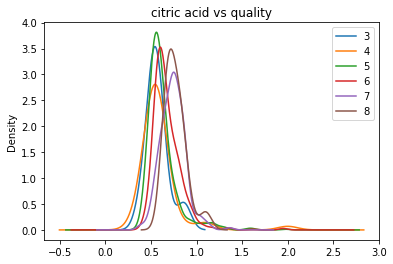

In [18]:
for i in [3, 4, 5, 6, 7, 8] :
    data.sulphates[data.quality==i].plot(kind='kde')
pt.title("sulphates vs quality")
pt.legend((3, 4, 5, 6, 7, 8))

In [3]:
data.shape

(1599, 12)

# no nan values, no categorical features, all features seems important so,  no (feature selection,preprocessing and featrure engineering)

In [19]:
X = data.iloc[:,0:11]
Y = data.iloc[:,11:12]

# splitting the datasets 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

# features scaling

In [22]:
from sklearn.preprocessing import StandardScaler
Sc_x=StandardScaler()
x_train=Sc_x.fit_transform(x_train)

In [23]:
from sklearn.preprocessing import StandardScaler
Sc_x=StandardScaler()
x_test=Sc_x.fit_transform(x_test)

# checking which hyper-parameter is good to take and then train the model.

In [36]:
from sklearn.neighbors import KNeighborsClassifier  
classifier  = KNeighborsClassifier(algorithm='auto', leaf_size= 1, n_neighbors = 16, weights = 'distance')
classifier.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\conda\conda\envs\spyder\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='distance')

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [29]:
n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))

hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

In [30]:
gridsearch = GridSearchCV(estimator=KNeighborsClassifier(),  
                     param_grid=hyperparams,
                     scoring='accuracy',
                     cv=10,n_jobs=-1)

In [31]:
gridsearch=gridsearch.fit(x_train,y_train) 
best_result = gridsearch.best_score_
best_parameters = gridsearch.best_params_

C:\Users\Admin\AppData\Local\conda\conda\envs\spyder\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Admin\AppData\Local\conda\conda\envs\spyder\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Admin\AppData\Local\conda\conda\envs\spyder\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [32]:
best_parameters

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 16, 'weights': 'distance'}

# accuracy with k-fold cross validation

In [38]:
best_result*100

67.6937441643324

# prediction time...................

In [39]:
y_predict = classifier.predict(x_test)

# check the accuracy with confusion matrix

In [40]:
 from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)

In [41]:
 from sklearn import metrics
print(metrics.accuracy_score(y_test,y_predict))

0.6268939393939394


# 62%-------> thats seems Ok!